In [ ]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [ ]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [ ]:
cohort = "experimental"             # cohort name

# data_method = "data_gamma"        # method name
data_method = "eval_single"         # method name
eval_method = "eval_nominal"        # method name

scene = "mid_gate"                  # scene name

courses = [                         # course names
    "robustness_track",
    ]   

roster = [
    "Maverick",                     # sifu_testbed
    "Rooster_v1",                   # sift_testbed
    "Rooster_v2",                   # sift_testbed
    "Rooster_v3",                   # sift_testbed
    ]


In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

======================================================================
Cohort : experimental                   Network: histNet
======================================================================
----------------------------------------------------------------------
Student: Maverick   | Epochs: 50    | Data Size: 103250.0/1750.0              
Time: 0h 6m 1s      | Train: 0.5827 | Test: 0.6330
----------------------------------------------------------------------
Student: Rooster_v1 | Epochs: 50    | Data Size: 103250.0/1750.0              
Time: 0h 7m 40s     | Train: 0.4741 | Test: 0.5369
----------------------------------------------------------------------
Student: Rooster_v2 | Epochs: 50    | Data Size: 103250.0/1750.0              
Time: 0h 7m 52s     | Train: 0.4861 | Test: 0.5203
----------------------------------------------------------------------
Student: Rooster_v3 | Epochs: 50    | Data Size: 103250.0/1750.0              
Time: 0h 7m 55s     | Train: 0.5776 | Test: 0.6610
======================================================================

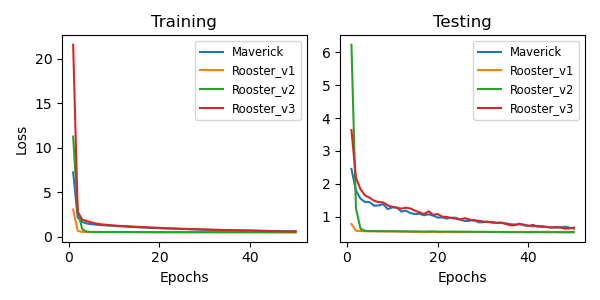

In [151]:
# # First Stage Training
# tp.train_roster(cohort,roster,"histNet",50,regen=False)

pl.plot_losses(cohort,roster,"histNet",use_log=False)

======================================================================
Cohort : experimental           Network: commNet
======================================================================
----------------------------------------------------------------------
Student: Maverick   | Epochs: 200   | Data Size: 103250.0/1750.0              
Time: 4h 19m 48s    | Train: 0.0015 | Test: 0.0032 | Eval TTE: 1.09
----------------------------------------------------------------------
Student: Rooster_v1 | Epochs: 200   | Data Size: 103250.0/1750.0              
Time: 4h 21m 36s    | Train: 0.0013 | Test: 0.0023 | Eval TTE: 0.36
----------------------------------------------------------------------
Student: Rooster_v2 | Epochs: 200   | Data Size: 103250.0/1750.0              
Time: 4h 21m 53s    | Train: 0.0015 | Test: 0.0028 | Eval TTE: 0.96
----------------------------------------------------------------------
Student: Rooster_v3 | Epochs: 200   | Data Size: 103250.0/1750.0              
Time: 4h 18m 47s    | Train: 0.0015 | Test: 0.0027 | Eval TTE: 0.90
======================================================================

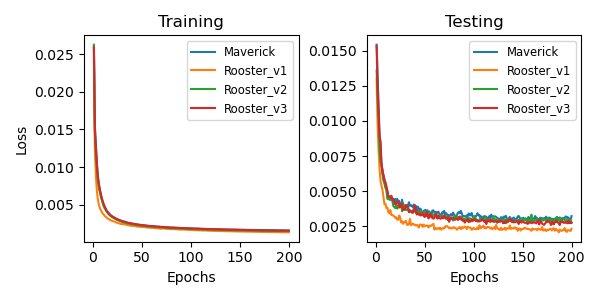

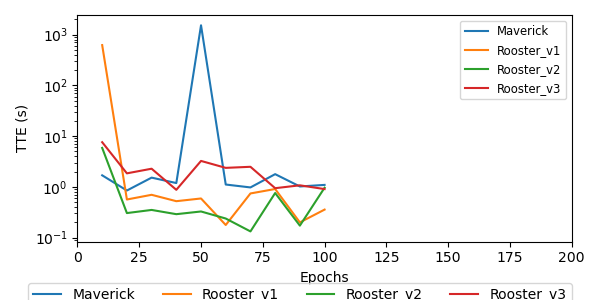

In [162]:
# # Second Stage Training
# tp.train_roster(cohort,roster,"commNet",100,regen=True,use_deploy=scene)

pl.plot_losses(cohort,roster,"commNet",use_log=False)

In [ ]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster,mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)